This is Tinku

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
labels = ['rugby', 'soccer']
img_size = 224
#data_dir="/content/drive/MyDrive/data_dir"
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:

train = get_data('/content/drive/MyDrive/train')
val = get_data('/content/drive/MyDrive/test')
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [ ]:
a_train = []
b_train = []
a_val = []
b_val = []

for feature, label in train:
  a_train.append(feature)
  b_train.append(label)

for feature, label in val:
  a_val.append(feature)
  b_val.append(label)

# Normalize the data
a_train = np.array(a_train) / 255
a_val = np.array(a_val) / 255

a_train.reshape(-1, img_size, img_size, 1)
b_train = np.array(b_train)

a_val.reshape(-1, img_size, img_size, 1)
b_val = np.array(b_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  
        zoom_range = 0.2,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False) 


datagen.fit(a_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(a_train,b_train,epochs = 10 , validation_data = (a_val, b_val))



Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


77/77 [==============================] - 164s 2s/step - loss: 0.6815 - accuracy: 0.5675 - val_loss: 0.6464 - val_accuracy: 0.6262
Epoch 2/10
77/77 [==============================] - 162s 2s/step - loss: 0.6192 - accuracy: 0.6634 - val_loss: 0.5866 - val_accuracy: 0.7115
Epoch 3/10
77/77 [==============================] - 160s 2s/step - loss: 0.5858 - accuracy: 0.6916 - val_loss: 0.5764 - val_accuracy: 0.7049
Epoch 4/10
77/77 [==============================] - 160s 2s/step - loss: 0.5456 - accuracy: 0.7250 - val_loss: 0.5131 - val_accuracy: 0.7721
Epoch 5/10
77/77 [==============================] - 161s 2s/step - loss: 0.5068 - accuracy: 0.7564 - val_loss: 0.4648 - val_accuracy: 0.8197
Epoch 6/10
77/77 [==============================] - 166s 2s/step - loss: 0.4662 - accuracy: 0.7878 - val_loss: 0.4313 - val_accuracy: 0.8262
Epoch 7/10
77/77 [==============================] - 166s 2s/step - loss: 0.4508 - accuracy: 0.7956 - val_loss: 0.5124 - val_accuracy: 0.7328
Epoch 8/10
77/77 [======

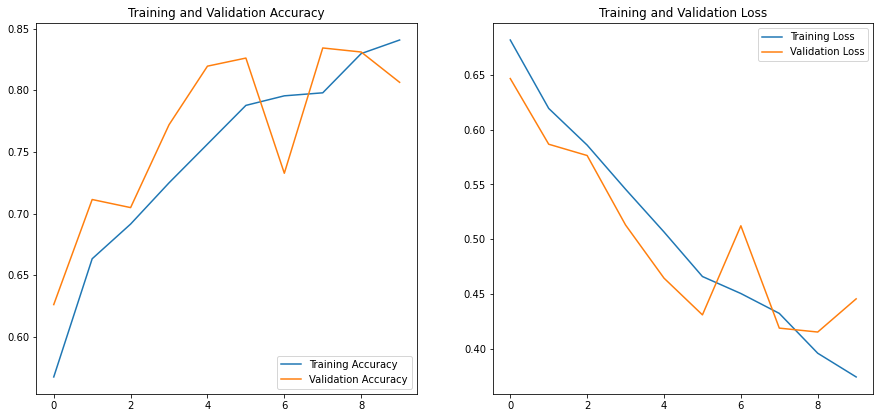

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predict_x=model.predict(a_val)
classes_x=np.argmax(predict_x,axis=1)
predictions=classes_x.reshape(1,-1)[0]
print(classification_report(b_val,predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

                  precision    recall  f1-score   support

 Rugby (Class 0)       0.74      0.94      0.83       305
Soccer (Class 1)       0.92      0.67      0.78       305

        accuracy                           0.81       610
       macro avg       0.83      0.81      0.80       610
    weighted avg       0.83      0.81      0.80       610



Task 1: Run the above code with given dataset.

Task 2: Run the code with different dataset




